In [ ]:
# Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Lendo o dataset de exemplo
dataset = pd.read_csv('ocup_leitos_brasil.csv')
X = dataset.iloc[:, 0].values.reshape(-1, 1)
y = dataset.iloc[:, 1].values.reshape(-1, 1)
z = dataset.iloc[:, 2].values.reshape(-1, 1)

In [ ]:
dataset

In [ ]:
# Último dia da lista
last_day = X[len(X)-1][0]
last_date = z[len(z)-1][0]
print(f'Último dia: \033[1;32m{last_day}\033[;m, data \033[1;32m{last_date}\033[;m')

Último dia: 297, data 2021-05-11


In [ ]:
# Determiando dias para predizer valores futuros
x1 = np.array([[last_day], [last_day+7], [last_day+14], [last_day+21], [last_day+28]])
x1

array([[297],
       [304],
       [311],
       [318],
       [325]])

In [ ]:
# Inserindo os dias para predizer dados futuros no array
X = np.concatenate((X, x1), axis=0)
X

array([[  0],
       [ 10],
       [ 24],
       [ 38],
       [ 52],
       [ 66],
       [ 80],
       [101],
       [115],
       [129],
       [143],
       [157],
       [170],
       [184],
       [198],
       [219],
       [226],
       [233],
       [240],
       [247],
       [254],
       [261],
       [268],
       [275],
       [282],
       [289],
       [297],
       [297],
       [304],
       [311],
       [318],
       [325]])

In [ ]:
# Normalizando os dados
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
X

array([[-1.90348124],
       [-1.80383884],
       [-1.66433948],
       [-1.52484012],
       [-1.38534076],
       [-1.24584139],
       [-1.10634203],
       [-0.89709299],
       [-0.75759363],
       [-0.61809427],
       [-0.47859491],
       [-0.33909555],
       [-0.20956042],
       [-0.07006106],
       [ 0.0694383 ],
       [ 0.27868734],
       [ 0.34843702],
       [ 0.4181867 ],
       [ 0.48793638],
       [ 0.55768606],
       [ 0.62743574],
       [ 0.69718542],
       [ 0.76693511],
       [ 0.83668479],
       [ 0.90643447],
       [ 0.97618415],
       [ 1.05589807],
       [ 1.05589807],
       [ 1.12564775],
       [ 1.19539743],
       [ 1.26514711],
       [ 1.33489679]])

In [ ]:
# Atribuindo valores a serem previstos
X_pred = X[27:]
X_pred

array([[1.05589807],
       [1.12564775],
       [1.19539743],
       [1.26514711],
       [1.33489679]])

In [ ]:
# Desacoplando valores futuros de X (dias)
X = np.delete(X, len(X)-1, 0)
X = np.delete(X, len(X)-1, 0)
X = np.delete(X, len(X)-1, 0)
X = np.delete(X, len(X)-1, 0)
X = np.delete(X, len(X)-1, 0)
X

array([[-1.90348124],
       [-1.80383884],
       [-1.66433948],
       [-1.52484012],
       [-1.38534076],
       [-1.24584139],
       [-1.10634203],
       [-0.89709299],
       [-0.75759363],
       [-0.61809427],
       [-0.47859491],
       [-0.33909555],
       [-0.20956042],
       [-0.07006106],
       [ 0.0694383 ],
       [ 0.27868734],
       [ 0.34843702],
       [ 0.4181867 ],
       [ 0.48793638],
       [ 0.55768606],
       [ 0.62743574],
       [ 0.69718542],
       [ 0.76693511],
       [ 0.83668479],
       [ 0.90643447],
       [ 0.97618415],
       [ 1.05589807]])

In [ ]:
X.shape

(27, 1)

In [ ]:
# # # #fitting os dados usando o kernel RBF
# # #poderia ser linear, etc
from sklearn.svm import SVR

regressor = SVR(kernel = 'poly', C=1, gamma='auto', degree=8, epsilon=.101, coef0=1)
regressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, cache_size=200, coef0=1, degree=8, epsilon=0.101, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Predizendo para valores de X futuros
y_pred = regressor.predict(X_pred)
y_pred = sc_y.inverse_transform(y_pred)
y_pred

array([76.88155512, 73.38256221, 71.50278142, 72.9863947 , 80.28557987])

In [ ]:
# Y = sc_y.inverse_transform(y)

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01) #curva suave
X_grid = X_grid.reshape((len(X_grid), 1))

X_pred = np.arange(min(X_pred), max(X_pred), 0.01) #curva suave
X_pred = X_pred.reshape((len(X_pred), 1))

In [ ]:
print(f'7 dias à frente: {y_pred[1]:.2f}%\n')
print(f'14 dias à frente: {y_pred[2]:.2f}%\n')
print(f'21 dias à frente: {y_pred[3]:.2f}%\n')
print(f'28 dias à frente: {y_pred[4]:.2f}%\n')

7 dias à frente: 73.38%

14 dias à frente: 71.50%

21 dias à frente: 72.99%

28 dias à frente: 80.29%



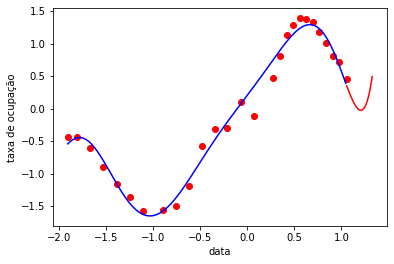

In [ ]:
# Visualizando os dados 
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.plot(X_pred, regressor.predict(X_pred), color = 'red')
plt.title('SVR - POLY (C=1, gamma="auto", degree=5, epsilon=.101, coef0=1)\n\n'
          f'7 dias à frente: {y_pred[1]:.2f}%\n'
          f'14 dias à frente: {y_pred[2]:.2f}%\n'
          f'21 dias à frente: {y_pred[3]:.2f}%\n'
          f'28 dias à frente: {y_pred[4]:.2f}%\n')
plt.xlabel('data')
plt.ylabel('taxa de ocupação')
plt.show()